# <center>Travel Project - Progetto Finale (start2impact University)</center>

## <center>Improving Airline Satisfaction through Predictive Analytics</center>

<img src="https://www.airport-technology.com/wp-content/uploads/sites/14/2022/01/shutterstock_758602234-min-1038x778.jpg" />

### Tables of Contents:

[1. Introduzione](#1.-Introduzione)

[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

[3. Preprocessing, Detecting Outliers e Best Feature Selection](#3.-Preprocessing,-Detecting-Outliers-e-Best-Feature-Selection)

[4. Scelta delle Metriche](#4.-Scelta-delle-Metriche)

[5. ML con tutte le features](#5.-ML-con-tutte-le-features)

[6. ML best features](#6.-ML-best-features)

[7. Conclusioni](#7.-Conclusioni)

## 1. Introduzione

L'obiettivo principale di questo progetto è prevedere la soddisfazione dei clienti di una compagnia aerea, valutando il livello di soddisfazione del servizio offerto. Per raggiungere questo scopo, utilizziamo una serie di variabili che vengono elencate e spiegate di seguito. Il nostro obiettivo finale è creare un modello accurato e affidabile in grado di prevedere la soddisfazione del servizio.


### 1.1. import librerie

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import zip_longest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

### 1.2. Studio dei dataset

In [2]:
# importo i 2 dataset 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Il nostro progetto si basa su un set di dati che è stato suddiviso in un train set e un test set. Nel processo di creazione del nostro modello di machine learning, considereremo il test set come dati completamente nuovi sui quali effettuare le nostre predizioni. Pertanto, ci focalizzeremo sul train set per analizzare il dataset e costruire il nostro modello.

In [3]:
print(df_train.shape)
print(df_test.shape)

(103904, 25)
(25976, 25)


In [4]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
# Info df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Per ottimizzare la costruzione del modello, ho deciso di eliminare due features che risultano essere del tutto casuali nei vari esempi del dataset. 

In [7]:
# Rimuovo le colonne 'Unnamed: 0' e 'id' in quanto non forniscono utilità ai fini dell'analisi o delle previsioni
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

Elenco delle features più il target:

1. **Gender**: maschio o femmina, Categorica
2. **Customer type**: cliente fidelizzato o non fidelizzato, Categorica
3. **Age**: l'età del cliente, Numerica
4. **Type of travel**: il tipo di viaggio (personale o per lavoro), Categorica
5. **Class**: la classe del viaggio (Eco, Business, Eco plus), Categorica
6. **Flight distance**: la distanza del volo, Numerica
7. **Inflight wifi service**: livello di soddisfazione del servizio wifi a bordo, Categorica ordinale (voto da 0 a 5)
8. **Departure/Arrival time convenient**: livello di soddisfazione dell'orario di partenza/arrivo, Categorica ordinale (voto da 0 a 5)
9. **Ease of Online booking**: facilità di prenotazione online, Categorica ordinale (voto da 0 a 5)
10. **Gate location**: posizione del gate, Categorica ordinale (voto da 0 a 5)
11. **Food and drink**: voto al mangiare e bere, Categorica ordinale (voto da 0 a 5)
12. **Online boarding**: check-in online, Categorica ordinale (voto da 0 a 5)
13. **Seat comfort**: comodità dei posti, Categorica ordinale (voto da 0 a 5)
14. **Inflight entertainment**: intrattenimento a bordo, Categorica ordinale (voto da 0 a 5)
15. **On-board service**: servizi a bordo, Categorica ordinale (voto da 0 a 5)
16. **Leg room service**: spazio per le gambe, Categorica ordinale (voto da 0 a 5)
17. **Baggage handling**: imbarco bagagli, Categorica ordinale (voto da 0 a 5)
18. **Checkin service**: checkin service, Categorica ordinale (voto da 0 a 5)
19. **Inflight service**: servizi a bordo, Categorica ordinale (voto da 0 a 5)
20. **Cleanliness**: pulizia, Categorica ordinale (voto da 0 a 5)
21. **Departure delay in minutes**: Minuti di ritardo alla partenza, Numerica
22. **Arrival delay in minutes**: Minuti di ritardo all'arrivo, Numerica

**satisfaction**: la variabile 'target' da predirre (neutral or dissatisfied e satisfied)

In [8]:
# Controllo eventuali valori nulli
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
df_train.dropna(inplace=True)

All'interno del set di addestramento, ho riscontrato la presenza di dati nulli. Considerando che ho un numero significativo di esempi nel mio train set, l'eliminazione di questi dati nulli non influirebbe in modo significativo sulle prestazioni complessive del modello. Pertanto, ho deciso di procedere con l'eliminazione dei dati nulli dal train set.

## 2. Exploratory Data Analysis

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


Le variabili *Departure Delay in Minutes* e *Arrival Delay in Minutes* mostrano una deviazione standard significativamente maggiore rispetto alla media. Questo suggerisce che la maggior parte dei voli ha ritardi minimi o addirittura pari a zero, ma esistono alcuni casi in cui i ritardi sono molto più estesi.

In [12]:
# creo 4 liste con i nomi delle features divise per tipologia
bin_features=['Gender','Customer Type','Type of Travel']
qua_features = ['Class']
num_features=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
ord_features=['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking'
                ,'Gate location' ,'Food and drink','Online boarding' ,'Seat comfort','Inflight entertainment',
                  'On-board service','Leg room service','Baggage handling','Checkin service',
                  'Inflight service','Cleanliness']


Counter({'neutral or dissatisfied': 58697, 'satisfied': 44897})


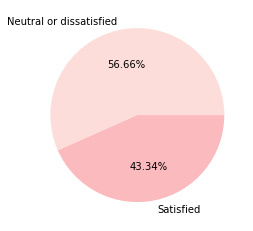

In [13]:
#Analizzo la distribuzione delle classi da predirre
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors=sns.color_palette('RdPu'), autopct = '%1.2f%%')
pass
print(Counter(df_train['satisfaction']))

C'è un leggero sbilanciamento a favore di *neutral or dissatisfied*. Essendo che lo sbilanciamento è minimo non andrò a effettuare operazioni di ribilanciamento.

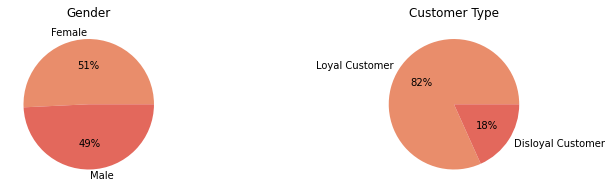

Counter({'Female': 52576, 'Male': 51018})
Counter({'Loyal Customer': 84662, 'disloyal Customer': 18932})


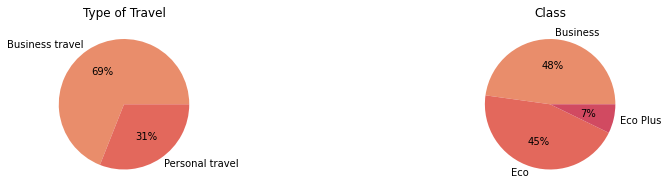

Counter({'Business travel': 71465, 'Personal Travel': 32129})
Counter({'Business': 49533, 'Eco': 46593, 'Eco Plus': 7468})


In [14]:
# Analisi delle variabili categoriche non ordinate
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Grafico per la variabile 'Gender'
ax1 = plt.subplot2grid((1, 2), (0, 0))
colors = sns.color_palette('flare')
plt.pie(df_train['Gender'].value_counts(), labels=['Female', 'Male'], colors=colors, autopct='%.0f%%')
plt.title('Gender')

# Grafico per la variabile 'Customer Type'
ax1 = plt.subplot2grid((1, 2), (0, 1))
plt.pie(df_train['Customer Type'].value_counts(), labels=['Loyal Customer', 'Disloyal Customer'], colors=colors, autopct='%.0f%%')
plt.title('Customer Type')

plt.show()

# Stampo le distribuzioni delle variabili 'Gender' e 'Customer Type'
print(Counter(df_train['Gender']))
print(Counter(df_train['Customer Type']))

fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Grafico per la variabile 'Type of Travel'
ax1 = plt.subplot2grid((1, 2), (0, 0))
plt.pie(df_train['Type of Travel'].value_counts(), labels=['Business travel', 'Personal travel'], colors=colors, autopct='%.0f%%')
plt.title('Type of Travel')

# Grafico per la variabile 'Class'
ax1 = plt.subplot2grid((1, 2), (0, 1))
plt.pie(df_train['Class'].value_counts(), labels=['Business', 'Eco', 'Eco Plus'], colors=colors, autopct='%.0f%%')
plt.title('Class')

plt.show()

# Stampo le distribuzioni delle variabili 'Type of Travel' e 'Class'
print(Counter(df_train['Type of Travel']))
print(Counter(df_train['Class']))


Il genere dei clienti è equamente distribuito tra maschi e femmine.
<br>Il numero di clienti fedeli è significativamente superiore rispetto a quelli non fedeli.
<br>I clienti che viaggiano per motivi di lavoro sono più numerosi rispetto a quelli che viaggiano per motivi personali.
<br>Per quanto riguarda le classi di viaggio, i clienti che scelgono l'opzione Eco Plus sono in minoranza rispetto a quelli che optano per le classi Business ed Economy.

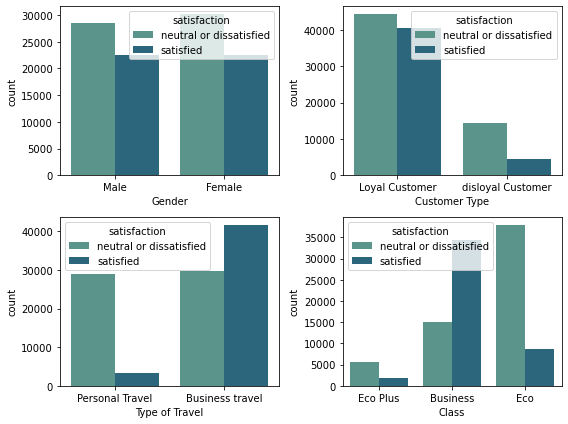

In [15]:
#Plotto come sono distribuite le due classi nelle variabili categoriche non ordinali

others = [k for k in bin_features + qua_features]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 3 * nrows))

for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.countplot(data=df_train, x=col, hue='satisfaction', palette='crest', ax=ax)

fig.tight_layout()


Analizzando i grafici, possiamo ottenere alcuni primi insights sul dataset per comprendere la sua struttura e i fattori che influenzano maggiormente la soddisfazione dei clienti.
<br>Innanzitutto, possiamo notare che il genere sembra avere un impatto limitato sulla soddisfazione dei clienti, anche se le donne sembrano essere leggermente meno soddisfatte rispetto agli uomini.
<br>D'altra parte, diventa evidente che i clienti fidelizzati sono significativamente più soddisfatti rispetto a quelli non fidelizzati. Questo suggerisce che l'esperienza e la relazione a lungo termine con l'azienda influenzano positivamente la soddisfazione complessiva del cliente.
<br>Inoltre, i clienti che viaggiano per motivi di lavoro sembrano essere decisamente più soddisfatti rispetto a coloro che viaggiano per motivi personali. Questo potrebbe essere dovuto a una maggiore attenzione e servizio forniti ai viaggiatori d'affari.
<br>Infine, emerge che i clienti che scelgono la classe di viaggio Business sono generalmente molto più soddisfatti rispetto a quelli che optano per le altre due classi (Economy e Eco Plus). Ciò potrebbe essere attribuito a un maggior comfort, servizi aggiuntivi e attenzione forniti ai passeggeri in Business Class.

Questi insights iniziali ci aiutano a comprendere meglio la dinamica della soddisfazione dei clienti nel dataset.

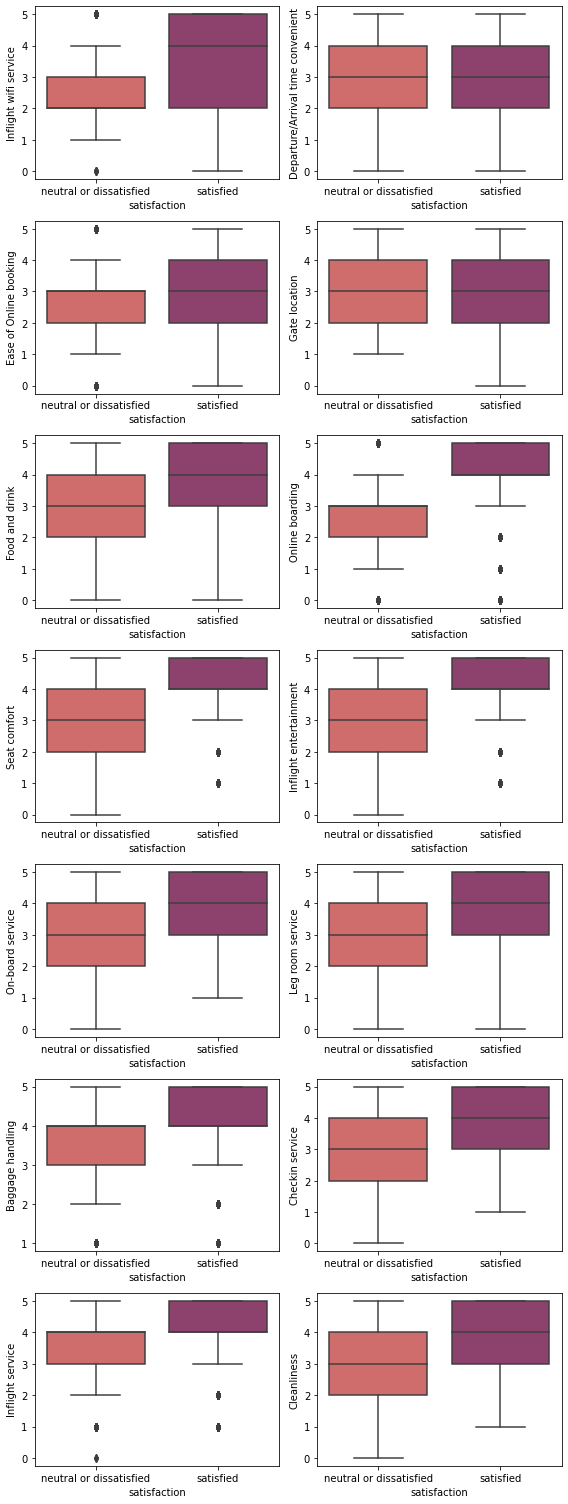

In [16]:
#Plotto come sono distribuite le due classi nelle variabili categoriche ordinali
others = [k for k in ord_features]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.boxplot(data=df_train, x='satisfaction',y=col, palette='flare', ax=ax)
fig.tight_layout()

Le caratteristiche che appaiono più significative per quanto riguarda la soddisfazione del cliente sono *Online boarding, Inflight Entertainment, Seat Comfort*. Al contrario, sembra che *Departure/Arrival time convenient* e *Gate location* abbiano una minima o nessuna influenza sulla soddisfazione dei clienti.

In [17]:
cols = num_features + ['satisfaction']
cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

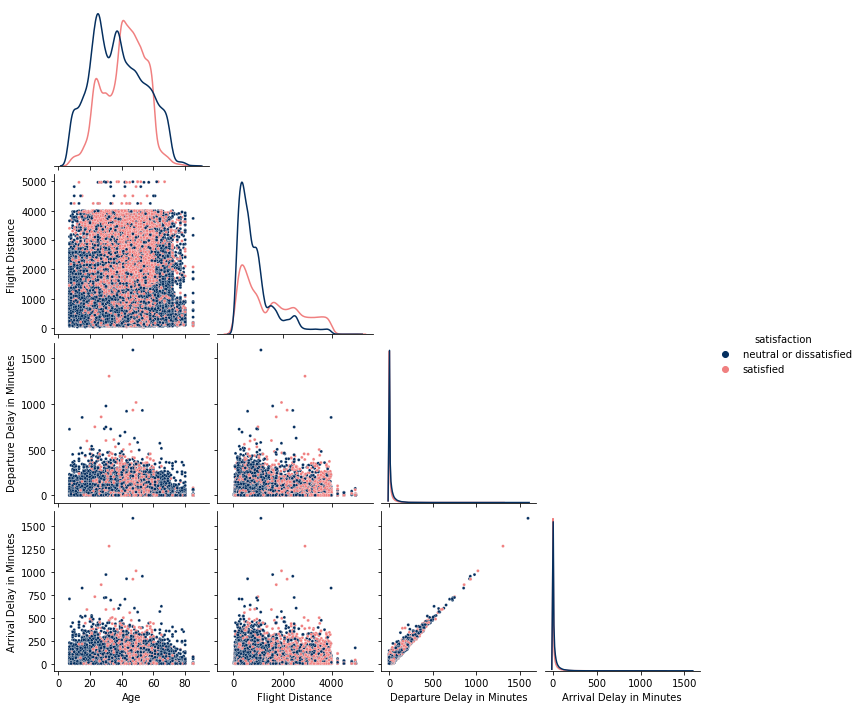

In [18]:
sns.pairplot(df_train[cols], 
             hue='satisfaction', 
             palette={'satisfied': '#F08080', 'neutral or dissatisfied': '#052F5F'}, 
             corner=True,
             diag_kws={'fill': False},
             plot_kws={'s': 9})

plt.show()

Ho eseguito un'analisi bivariata sulle caratteristiche numeriche al fine di valutare la loro distribuzione in relazione alla nostra variabile target. Tuttavia, nessuna delle caratteristiche sembra riuscire a distinguere chiaramente le due classi all'interno degli esempi.

Eseguo una serie di plot per visualizzare la distribuzione delle variabili numeriche in relazione alle variabili categoriche.

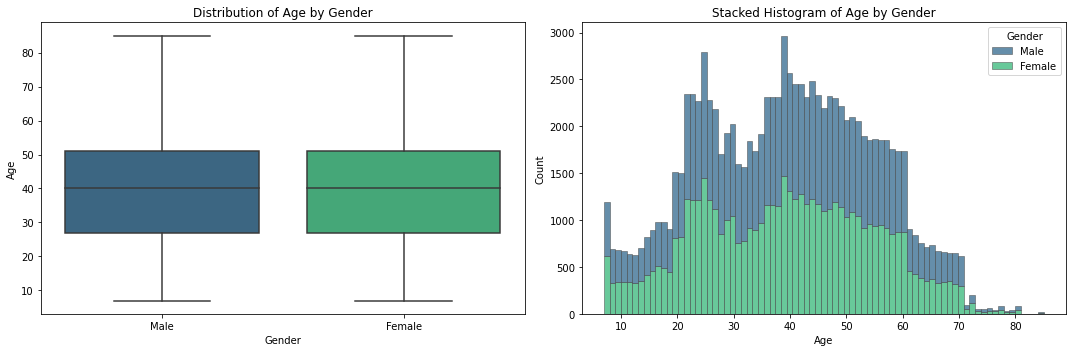

In [19]:
# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Age' in base a 'Gender'
sns.boxplot(x='Gender', y='Age', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Age by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

# Istogramma impilato per la distribuzione di 'Age' in base a 'Gender'
sns.histplot(df_train, x='Age', hue='Gender', multiple='stack', palette='viridis',
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Age by Gender')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


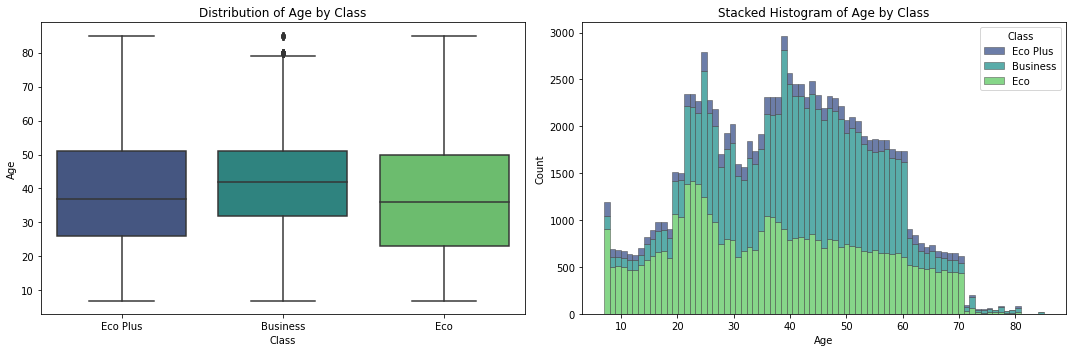

In [20]:

# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Age' in base a 'Class'
sns.boxplot(x='Class', y='Age', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Age by Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Age')

# Istogramma impilato per la distribuzione di 'Age' in base a 'Class'
sns.histplot(df_train, x='Age', hue='Class', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Age by Class')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


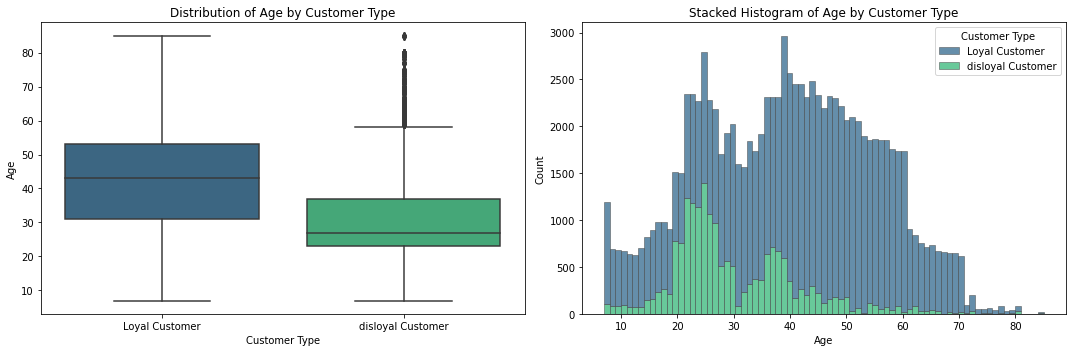

In [21]:


# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Age' in base a 'Customer Type'
sns.boxplot(x='Customer Type', y='Age', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Age by Customer Type')
axes[0].set_xlabel('Customer Type')
axes[0].set_ylabel('Age')

# Istogramma impilato per la distribuzione di 'Age' in base a 'Customer Type'
sns.histplot(df_train, x='Age', hue='Customer Type', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Age by Customer Type')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


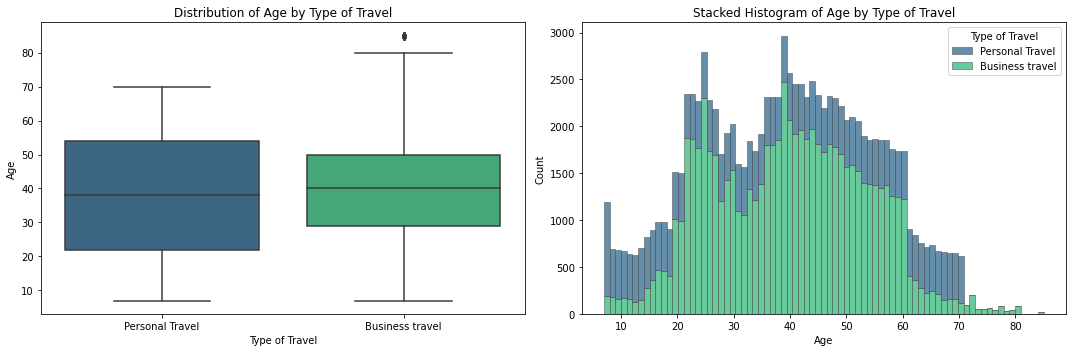

In [22]:


# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Age' in base a 'Type of Travel'
sns.boxplot(x='Type of Travel', y='Age', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Age by Type of Travel')
axes[0].set_xlabel('Type of Travel')
axes[0].set_ylabel('Age')

# Istogramma impilato per la distribuzione di 'Age' in base a 'Type of Travel'
sns.histplot(df_train, x='Age', hue='Type of Travel', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Age by Type of Travel')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


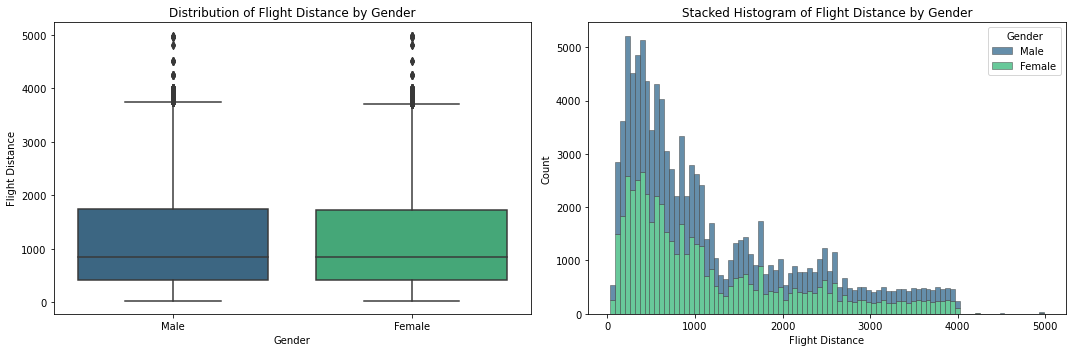

In [23]:

# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Flight Distance' in base a 'Gender'
sns.boxplot(x='Gender', y='Flight Distance', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Flight Distance by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Flight Distance')

# Istogramma impilato per la distribuzione di 'Flight Distance' in base a 'Gender'
sns.histplot(df_train, x='Flight Distance', hue='Gender', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Flight Distance by Gender')
axes[1].set_xlabel('Flight Distance')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()

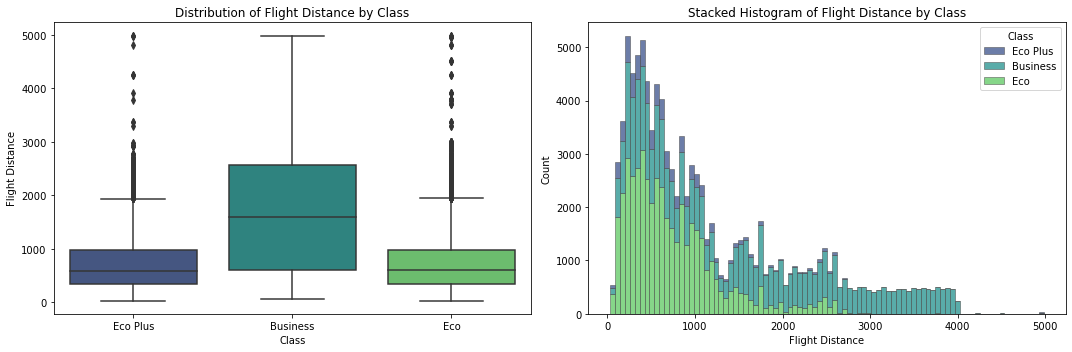

In [24]:

# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Flight Distance' in base a 'Class'
sns.boxplot(x='Class', y='Flight Distance', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Flight Distance by Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Flight Distance')

# Istogramma impilato per la distribuzione di 'Flight Distance' in base a 'Class'
sns.histplot(df_train, x='Flight Distance', hue='Class', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Flight Distance by Class')
axes[1].set_xlabel('Flight Distance')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


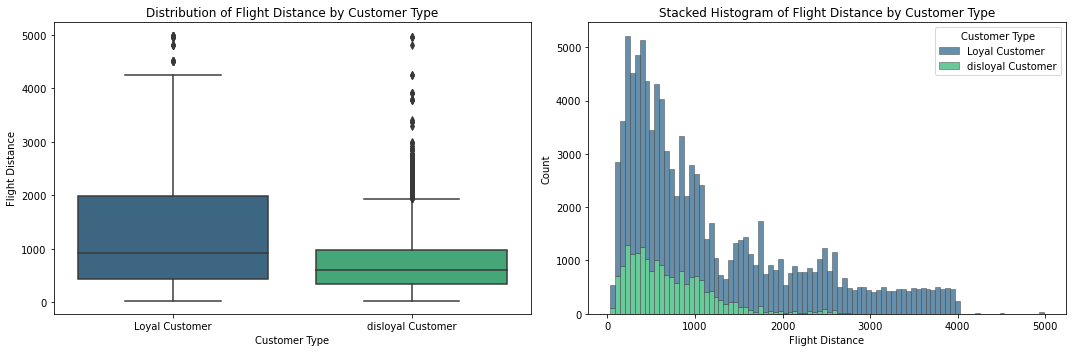

In [25]:

# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Flight Distance' in base a 'Customer Type'
sns.boxplot(x='Customer Type', y='Flight Distance', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Flight Distance by Customer Type')
axes[0].set_xlabel('Customer Type')
axes[0].set_ylabel('Flight Distance')

# Istogramma impilato per la distribuzione di 'Flight Distance' in base a 'Customer Type'
sns.histplot(df_train, x='Flight Distance', hue='Customer Type', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Flight Distance by Customer Type')
axes[1].set_xlabel('Flight Distance')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


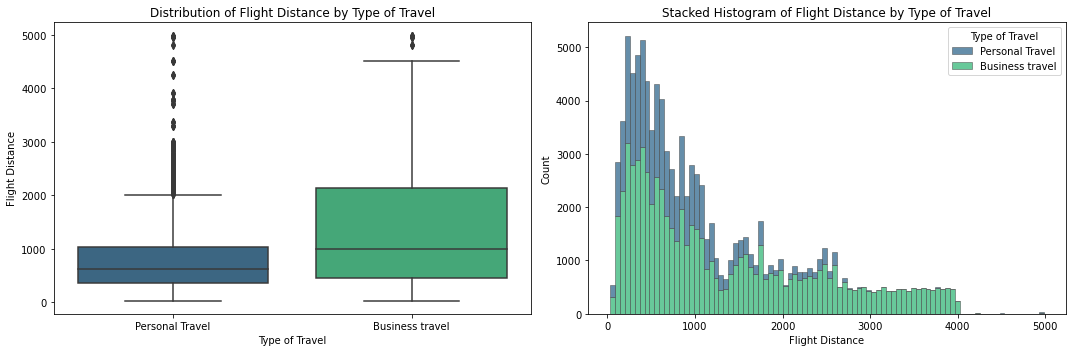

In [26]:

# Creazione dei subplot per i grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot per la distribuzione di 'Flight Distance' in base a 'Type of Travel'
sns.boxplot(x='Type of Travel', y='Flight Distance', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Flight Distance by Type of Travel')
axes[0].set_xlabel('Type of Travel')
axes[0].set_ylabel('Flight Distance')

# Istogramma impilato per la distribuzione di 'Flight Distance' in base a 'Type of Travel'
sns.histplot(df_train, x='Flight Distance', hue='Type of Travel', multiple='stack', palette='viridis', 
             edgecolor=".3", linewidth=.5, ax=axes[1])
axes[1].set_title('Stacked Histogram of Flight Distance by Type of Travel')
axes[1].set_xlabel('Flight Distance')
axes[1].set_ylabel('Count')

# Mostra i grafici
plt.tight_layout()
plt.show()


In questa serie di plot ho scoperto:
- Non sono state riscontrate differenze di età in relazione al genere dei clienti
- I passeggeri che scelgono la classe business tendono ad essere in generale più anziani, con un'età compresa prevalentemente tra i 35 e i 55 anni. Per le altre due classi, la fascia d'età più comune si estende dai 25 ai 55 anni
- I clienti che mostrano maggiore fedeltà alla compagnia sono anche quelli che hanno un'età più avanzata
- I viaggiatori d'affari mostrano un intervallo di età più limitato, compreso approssimativamente tra i 35 e i 45 anni, mentre coloro che viaggiano per motivi personali presentano un'ampia gamma di età, che va dai 20 ai 55 anni circa
- Non sono state riscontrate differenze di genere nella distanza dei voli. Sia gli uomini che le donne effettuano viaggi con distanze simili
- I clienti che scelgono di effettuare viaggi più lunghi sono anche quelli che optano per la classe business
- I clienti fedeli alla compagnia aerea sono soliti effettuare un maggior numero di viaggi di lunga durata
- I clienti che viaggiano per motivi di lavoro sono anche quelli che coprono le distanze di volo più lunghe

## 3. Preprocessing, Detecting Outliers e Best Feature Selection

### 3.1. Processing

In [27]:

# Trasformo la variabile target in valori 0 e 1
df_train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
df_test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

# Applico LabelEncoder sulle colonne binarie per trasformarle in numeri 0 e 1
binary_cols = ['Gender', 'Customer Type', 'Type of Travel']
for col in binary_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

# Applico OneHotEncoder tramite "get_dummies" sulla variabile 'Class'
df_train = pd.get_dummies(df_train, columns=['Class'])
df_test = pd.get_dummies(df_test, columns=['Class'])

# Trasformo tutte le colonne in tipo numerico
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')


<AxesSubplot:>

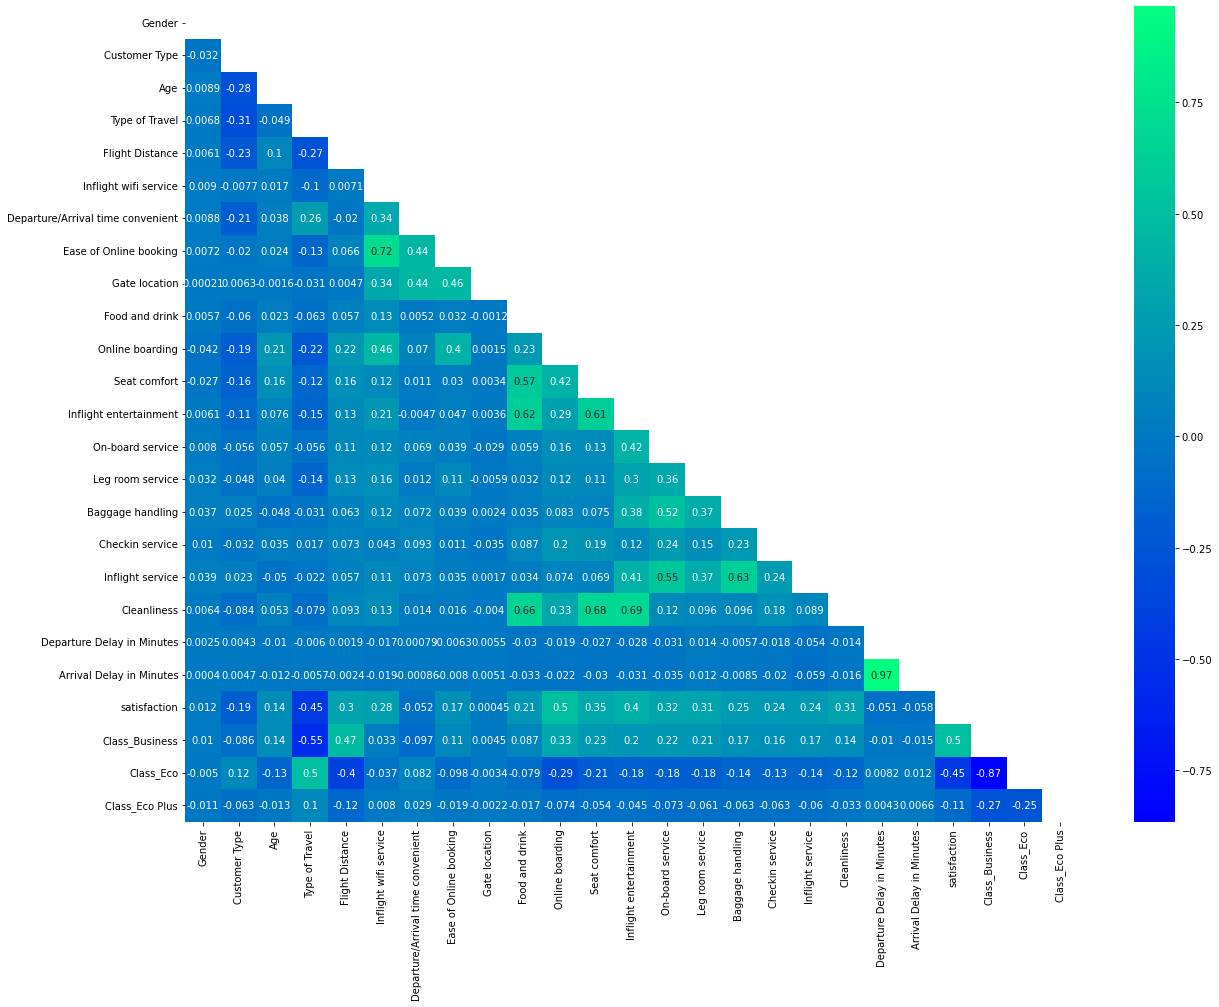

In [28]:
# Plotto la correlation matrix
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
sns.heatmap(df_train.corr(), annot=True, cmap='winter', mask=mask)


Le correlazioni più significative sono state osservate con le variabili *Online boarding* e *Class_Business*, seguite da *Class_Eco* e *Type of Travel*.

Ho notato una correlazione estremamente alta tra due variabili, *Departure Delay in Minutes* e *Arrival Delay in Minutes*. Una correlazione così forte tra due variabili non target suggerisce l'opportunità di eliminarne una per evitare problemi di multicollinearità.

Ho riscontrato una correlazione abbastanza alta tra *Inflight wifi service* e *Ease of booking online*.

La variabile *Cleanliness* mostra una buona correlazione con *Food and drink*, *Seat comfort* e *Inflight entertainment*.

In [29]:
#Elimino "Arrival Delay in Minutes"
df_train.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)
df_test.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)

In [30]:
# Divido i due dataset in X (tutte le features senza target) e y (solo il target)
X_train = df_train.drop('satisfaction', axis=1)
y_train = df_train['satisfaction']

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

# Normalizzo i dati
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


### 3.2. detecting Outliers 

In [31]:
# Ricerco ed elimino gli outliers dal train
el = EllipticEnvelope(contamination=0.01)
y_outliers = el.fit_predict(X_train)

n_outliers = (y_outliers == -1).sum()
X_train = X_train[y_outliers != -1]
y_train = y_train[y_outliers != -1]

print(f"Il numero di outliers rimossi è: {n_outliers}")


Il numero di outliers rimossi è: 1036


### 3.3. Best features selection

#### 3.3.1. Chi-square

Il test del Chi-square è un test statistico utilizzato per valutare la significatività della relazione tra due variabili categoriche. Questo test ci consente di determinare se la relazione osservata tra le variabili è statisticamente rilevante o se può essere attribuita al caso.

In [32]:
# Eseguo il test del chi-square solo per le features categoriche, inclusi i features ordinali

X_train_chi_square = X_train[bin_features+ord_features + ['Class_Eco']+ ['Class_Business'] + ['Class_Eco Plus']]

# Calcolo i valori di chi-square 
f_score = chi2(X_train_chi_square, y_train)

# Creo un DataFrame del chi-square
chi2_score = pd.DataFrame(f_score[0], columns=['score'])
chi2_score.index = X_train_chi_square.columns
chi2_score_sorted = chi2_score.sort_values(by=['score'], ascending=False)
chi2_score_sorted

,score
Type of Travel,14288.412121
Class_Business,13616.390002
Class_Eco,11530.112382
Customer Type,2966.327159
Online boarding,2924.943868
Inflight entertainment,1732.514922
Seat comfort,1257.246255
Inflight wifi service,1066.882956
On-board service,1060.338010
Class_Eco Plus,1057.254958


#### 3.3.2. Mutual information

La mutual information è una misura di dipendenza statistica tra due variabili. Rappresenta la quantità di informazione che una variabile fornisce sull'altra. In altre parole, la mutual information misura quanto le due variabili condividono informazioni comuni. Nel nostro caso valuta l'importanza delle features rispetto al target.

In [33]:
# Calcolo dello score di dipendenza mutual information tra le features e il target
score_m = mutual_info_classif(X_train, y_train)

# Creazione del DataFrame per visualizzare lo score di dipendenza delle features
mutual_score = pd.DataFrame(score_m, columns=['score'])
mutual_score.index = X_train.columns

# Ordinamento del DataFrame in ordine decrescente degli score
mutual_score_sorted = mutual_score.sort_values(by='score', ascending=False)

mutual_score_sorted


,score
Online boarding,0.214116
Inflight wifi service,0.165069
Class_Business,0.136087
Type of Travel,0.116411
Class_Eco,0.109511
Inflight entertainment,0.095320
Seat comfort,0.080806
Leg room service,0.062637
Flight Distance,0.062175
On-board service,0.060872


Dopo aver esaminato l'intera analisi, si nota che la dipendenza della nostra variabile target rispetto alle variabili numeriche è relativamente bassa. Tuttavia, sia il test del chi-square che il calcolo dello score di dipendenza mutual information ci forniscono risultati simili, indicando spesso le stesse features come le più rilevanti.


## 4. Scelta delle Metriche

La principale metrica che utilizzerò per valutare i modelli è l'Accuracy. Questa metrica è particolarmente adatta per problemi di classificazione binaria con classi bilanciate. L'Accuracy misura la percentuale di previsioni corrette fatte dal modello e assume valori compresi tra 0 e 1, dove 1 rappresenta il risultato ottimale.

Tuttavia, l'Accuracy da sola non fornisce una visione completa delle prestazioni del modello. Ad esempio, non fa distinzione tra falsi positivi e falsi negativi, che possono avere un impatto significativo a seconda del contesto. Per affrontare questa limitazione, userò la Confusion Matrix.

La Confusion Matrix ci permette di visualizzare numericamente il numero di veri negativi, falsi positivi, falsi negativi e veri positivi.

In [52]:
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    
    # Ricava i migliori parametri
    print(f'I migliori parametri sono {model.best_params_}')
    
    # Calcola l'accuratezza sul test set
    accuracy_test = model.score(X_test, y_test)
    print(f'Accuratezza test: {accuracy_test}')

    # Calcola l'accuratezza sul train set
    accuracy_train = model.score(X_train, y_train)
    print(f'Accuratezza train: {accuracy_train}')

    # Mostra la matrice di confusione
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues')
    plt.show()

## 5. ML con tutte le features

Per l'analisi predittiva, seguirò due approcci distinti. Nel primo approccio, utilizzerò tutte le features disponibili, mentre nel secondo approccio utilizzerò solo le quattro features che sono emerse come le più rilevanti dalle analisi precedenti.

Successivamente, testerò diversi modelli per la predizione: Logistic Regression, AdaBoost Classifier e Random Forest. Per valutare le prestazioni dei modelli, effettuerò uno spot-check utilizzando la tecnica di cross_val_score, che stima l'accuratezza dei modelli attraverso la validazione incrociata.

Successivamente, selezionerò i due modelli che ottengono i risultati migliori e procederò al tuning degli iperparametri per ottimizzare ulteriormente le prestazioni dei modelli selezionati.

In [34]:
#Preparo il selezionatore di fold
seed = 42
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)

#### 5.1.1. Logistic Regression

In [35]:
lr_c = LogisticRegression()
result0 = cross_val_score(lr_c,X_train, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result0.mean())

0.8754070652343403


#### 5.1.2. AdaBoost

In [36]:
ada_c = AdaBoostClassifier()
result1 = cross_val_score(ada_c,X_train, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result1.mean())

0.927133918730713


#### 5.1.3. Random Forest

In [37]:
rf_c = RandomForestClassifier()
result2 = cross_val_score(rf_c,X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.9623237285415355


Dopo aver eseguito lo spot-check sui modelli, è emerso che il modello Random Forest ha ottenuto il risultato migliore, con un'Accuracy del 96%. Al secondo posto si posiziona il modello AdaBoost, con un'Accuracy del 92%.

A questo punto procederemo con il tuning degli iperparametri su questi due modelli.

### 5.2. Hyperparameters tuning

#### 5.2.1. Random Forest

In [38]:
# parametri di default Random Forest
params = rf_c.get_params()
params_df = pd.DataFrame(params, index=['Default'])
params_df.T

,Default
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [40]:
#parametri su quali faremo il tuning
param_grid_rfc2=[{'n_estimators' : [10, 100, 1000],
'max_depth' : [5, 8, 15, 25],
'max_features' : ['sqrt', 'log2']}]

In [41]:
grid_rfc= GridSearchCV(estimator=rf_c, param_grid=param_grid_rfc2, cv=3, verbose = 10, n_jobs = -1,scoring='accuracy')
res = grid_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


I migliori parametri sono {'max_depth': 25, 'max_features': 'log2', 'n_estimators': 1000}
Accuratezza test: 0.9629273175238682
Accuratezza train: 0.9991809512666003


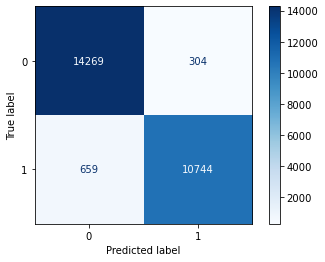

In [53]:
evaluate_model_performance(grid_rfc, X_train, X_test, y_train, y_test)


#### 5.2.2. AdaBoost

In [43]:
# parametri di default Adaboost
params = ada_c.get_params()
params_df = pd.DataFrame(params, index=['Default'])
params_df.T

,Default
algorithm,SAMME.R
base_estimator,None
learning_rate,1.0
n_estimators,50
random_state,None


In [44]:
#parametri su quali faremo il tuning
param_grid_adac=[{'n_estimators':[10, 50, 100, 500],
'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}]

In [45]:
grid_adac= GridSearchCV(estimator=ada_c, param_grid=param_grid_adac, cv=3, verbose = 10, n_jobs = -1,scoring='accuracy')
res2 = grid_adac.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


I migliori parametri sono {'learning_rate': 1.0, 'n_estimators': 100}
Accuratezza test: 0.9287419156144133
Accuratezza train: 0.9293960490649193


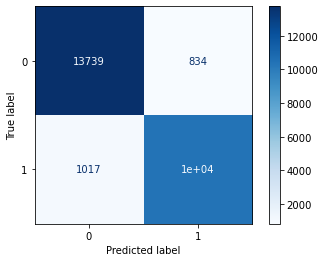

In [54]:
evaluate_model_performance(grid_adac, X_train, X_test, y_train, y_test)


Il risultato migliore sul Test ce l'ha Random Forest con un 96% di Accuracy. AdaBoost ottiene invece un Accuracy del 93% sul Test. La Confusion Matrix mostra che la maggior parte di veri positivi e veri negativi sono predetti bene. Random Forest ottiene più del doppio falsi negativi rispetto ai falsi positivi, invece nell' AdaBoost sono quasi uguali.

## 6. ML best features

Utilizzerò solo le features che ho reputato più influenti.

In [55]:
# selezioniamo le migliori features
best_features = ['Online boarding', 'Class_Business', 'Type of Travel', 'Class_Eco']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]


#### 6.1.1. Logistic Regression

In [56]:
lr_c = LogisticRegression()
result0 = cross_val_score(lr_c, X_train_best, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result0.mean())

0.8134616004825469


#### 6.1.2. AdaBoost

In [57]:
ada_c = AdaBoostClassifier()
result1 = cross_val_score(ada_c, X_train_best, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result1.mean())

0.8381013380710753


#### 6.1.3. Random Forest

In [58]:
rf_c = RandomForestClassifier()
result2 = cross_val_score(rf_c, X_train_best, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.8505040461979277


I migliori due algoritmi continuano a rimanere Random Forest e AdaBoost con rispettivamente 85% e 83% di Accuracy

### 6.2. Hyperparameters tuning

#### 6.2.1. Random Forest

In [59]:
#parametri su quali faremo il tuning
param_grid_rfc2=[{'n_estimators' : [10, 100, 1000],
'max_depth' : [5, 8, 15, 25],
'max_features' : ['sqrt', 'log2']}]

In [60]:
grid_rfc_best= GridSearchCV(estimator=rf_c, param_grid=param_grid_rfc2, cv=3, verbose = 10, n_jobs = -1,scoring='accuracy')
res_best = grid_rfc_best.fit(X_train_best,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


I migliori parametri sono {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
Accuratezza test: 0.8475515860794579
Accuratezza train: 0.8505041049942471


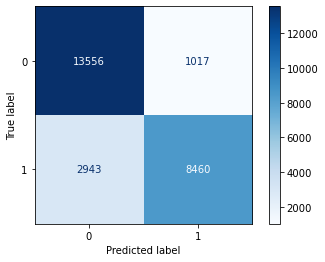

In [61]:
evaluate_model_performance(grid_rfc_best, X_train_best, X_test_best, y_train, y_test)


#### 6.2.2. Random Forest

In [62]:
#parametri su quali faremo il tuning
param_grid_adac=[{'n_estimators':[10, 50, 100, 500],
'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}]

In [63]:
grid_adac_best= GridSearchCV(estimator=ada_c, param_grid=param_grid_adac, cv=3, verbose = 10, n_jobs = -1,scoring='accuracy')
res2_best = grid_adac_best.fit(X_train_best,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


I migliori parametri sono {'learning_rate': 0.1, 'n_estimators': 100}
Accuratezza test: 0.8350785340314136
Accuratezza train: 0.8381403693519764


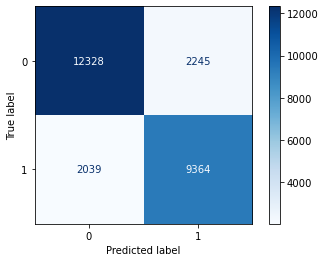

In [64]:
evaluate_model_performance(grid_adac_best, X_train_best, X_test_best, y_train, y_test)


Il risultato migliore sul Test ce l'ha ancora Random Forest con un 85% di Accuracy. AdaBoost ottiene invece un Accuracy del 84% sul Test. In questo caso però notiamo che i valori di Accuracy tra Train e Test, per Random Forest, sono motlo più vicini. La Confusion Matrix mostra che rispetto a prima abbiamo un aumento dei valori falso negativo e valso positivo. Random Forest ottiene ancora più del doppio falsi negativi rispetto ai falsi positivi, invece nell' AdaBoost sono quasi uguali.

## 7. Conclusioni

Durante la valutazione del modello è evidente che utilizzando solo le best features l'Accuracy diminuisce su entrambi i modelli. Sebbene abbiamo selezionato le features ritenute migliori è probabile che molte altre variabili abbiano un'influenza significativa.

Un aspetto positivo dei modelli basati sulle best features è che mostrano una coerenza tra i dati di addestramento e i dati di test. Ciò indica che questi modelli sono più robusti e adatti a valutare nuovi dati.

Il modello Random Forest con tutte le features, anche con la discrepanza di Accuracy tra train e test pari al 3%, risulta essere il miglior modello in quanto i valori di Accuracy sono etremamente elevati rendendo la discrepanza trascurabile.